In [97]:
import os
import numpy as np
import albumentations as A
from PIL import Image
from helpers import *

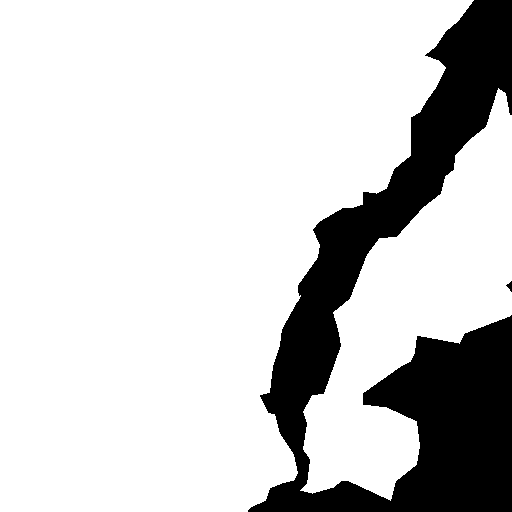

In [73]:
#image = Image.open('00000_26568_774.png')
image = Image.open('00022_14961_2322.png').convert('L')
#image = Image.open('hola.jpg')
#image.show()
image

In [66]:
aug = A.HorizontalFlip(p=1)
augmented_image = aug(image=np.array(image))['image']
augmented_image = Image.fromarray(augmented_image)
augmented_image.show()

Abriendo en una sesión existente del navegador


In [67]:
aug = A.VerticalFlip(p=1)
augmented_image = aug(image=np.array(image))['image']
augmented_image = Image.fromarray(augmented_image)
augmented_image.show()

Abriendo en una sesión existente del navegador


In [72]:
#np.array(image)
#np.array(image).astype(int)
#np.array(image).astype(float)
#np.array(image, dtype=np.uint8)

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [74]:
aug = A.Rotate([90,90], p=1)
augmented_image = aug(image=np.array(image))['image']
augmented_image = Image.fromarray(augmented_image)
augmented_image.show()

Abriendo en una sesión existente del navegador


[8097:8097:0100/000000.759982:ERROR:zygote_linux.cc(664)] write: Tubería rota (32)


In [75]:
aug = A.Rotate(limit=[180,180], p=1)
augmented_image = aug(image=np.array(image))['image']
augmented_image = Image.fromarray(augmented_image)
augmented_image.show()

Abriendo en una sesión existente del navegador


[8142:8142:0100/000000.011974:ERROR:zygote_linux.cc(664)] write: Tubería rota (32)


In [77]:
aug = A.Rotate([270,270], p=1)
augmented_image = aug(image=np.array(image))['image']
augmented_image = Image.fromarray(augmented_image)
#augmented_image.show()
augmented_image.save('tss.png')

---

# ESTA

In [100]:
def generate_augmented_images(image_path, img): #img = 'patch' ó 'mask'
    image = Image.open(image_path) if img=='patch' else Image.open(image_path).convert('L')
    augs = [A.HorizontalFlip(p=1), A.VerticalFlip(p=1), A.Rotate(limit=[90, 90], p=1),
        A.Rotate(limit=[180, 180], p=1), A.Rotate(limit=[270, 270], p=1),]
    augmented_images = [aug(image=np.array(image))['image'] for aug in augs]
    return augmented_images

def do_aug_dataset(path_mask, path_patch, path_output):
    check_dir(os.path.join(path_output,'aug_masks'))
    check_dir(os.path.join(path_output,'aug_patches'))
    files = os.listdir(path_mask)
    for file in files:
        aug_masks = generate_augmented_images(os.path.join(path_mask,file), 'mask')
        aug_patchs = generate_augmented_images(os.path.join(path_patch,file), 'patch')
        for i, (aug_mask, aug_patch) in enumerate(zip(aug_masks, aug_patchs)):
            fn = f'{file[:-4]}_{i}.jpg'
            aug_mask = Image.fromarray(aug_mask)
            aug_mask.save(os.path.join(path_output,'aug_masks',fn))
            aug_patch = Image.fromarray(aug_patch)
            aug_patch.save(os.path.join(path_output,'aug_patches',fn))
    
path_mask = '/home/user/Documentos/masking the tissue/dataset1/mask'
path_patch = '/home/user/Documentos/masking the tissue/dataset1/patch'
path_output = '/home/user/Documentos/masking the tissue/dataset1'
do_aug_dataset(path_mask, path_patch, path_output)

---

In [88]:
img = 'mask'
#image_path = '00000_26568_774.png' #patch
image_path = '00022_14961_2322.png' #mask
image = Image.open(image_path) if img=='patch' else Image.open(image_path).convert('L')

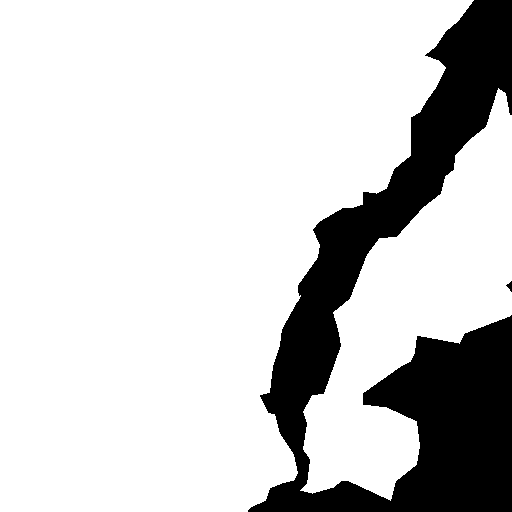

In [89]:
image

In [94]:
files = os.listdir('/home/user/Documentos/masking the tissue/dataset1/mask')
for file in files:
    print(f'{file[:-4]}')

00000_26568_774
00001_26826_774
